In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import lightgbm as lgb

In [24]:
df = pd.read_csv('output/please_final.csv', encoding='utf8')

In [34]:
# 상동역
is_sangdong = df['자전거대여소명'] == '상동역'
sangdong= df[is_sangdong]
#sangdong
df = df.drop(columns=['Unnamed:0'], axis=1)
df
display(df)

SyntaxError: invalid syntax (<ipython-input-34-b897385b5df8>, line 5)

In [58]:
x = sangdong[['강수','강수형태','기온','풍속','풍향','학원_5분이내수', '학원_5분이내거리최소','학원_5분이내거리평균','학원_5분이내거리최대','버스_5분이내수','버스_5분이내거리최소','버스_5분이내거리평균','버스_5분이내거리최대',
               '콘서트장_5분이내수','콘서트장_5분이내거리최소','콘서트장_5분이내거리평균','콘서트장_5분이내거리최대','공공시설_5분이내수','공공시설_5분이내거리최소','공공시설_5분이내거리평균','공공시설_5분이내거리최대',
               '홀_5분이내수','홀_5분이내거리최소','홀_5분이내거리평균','홀_5분이내거리최대','미술관박물관(전시시설)_5분이내수','미술관박물관(전시시설)_5분이내거리최소','미술관박물관(전시시설)_5분이내거리평균','미술관박물관(전시시설)_5분이내거리최대','학교_5분이내수','학교_5분이내거리최소','학교_5분이내거리평균','학교_5분이내거리최대','체육시설_5분이내수','체육시설_5분이내거리최소',
               '체육시설_5분이내거리평균','체육시설_5분이내거리최대','스타벅스_5분이내수','스타벅스_5분이내거리최소','스타벅스_5분이내거리평균','스타벅스_5분이내거리최대','부동산_5분이내수','부동산_5분이내거리최소','부동산_5분이내거리평균','부동산_5분이내거리최대','학문/교육_5분이내수','학문/교육_5분이내거리최소','학문/교육_5분이내거리평균','학문/교육_5분이내거리최대',
               '음식점_5분이내수','음식점_5분이내거리최소','음식점_5분이내거리평균','음식점_5분이내거리최대','생활서비스_5분이내수','생활서비스_5분이내거리최소','생활서비스_5분이내거리평균','생활서비스_5분이내거리최대','소매점_5분이내수','소매점_5분이내거리최소','소매점_5분이내거리평균','소매점_5분이내거리최대','스포츠_5분이내수','스포츠_5분이내거리최소','스포츠_5분이내거리평균',
               '스포츠_5분이내거리최대','숙박_5분이내수','숙박_5분이내거리최소','숙박_5분이내거리평균','숙박_5분이내거리최대','관광/여가/오락_5분이내수','관광/여가/오락_5분이내거리최소','관광/여가/오락_5분이내거리평균','관광/여가/오락_5분이내거리최대','지하철 역_5분이내수','지하철 역_5분이내거리최소','지하철 역_5분이내거리평균','지하철 역_5분이내거리최대','청소년 수련시설_5분이내수','청소년 수련시설_5분이내거리최소','청소년 수련시설_5분이내거리평균','청소년 수련시설_5분이내거리최대']]
y = sangdong[['자전거대여량']]

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [6]:
mlr = LinearRegression()
mlr.fit(x_train, y_train) 

LinearRegression()

In [7]:
y_predict = mlr.predict(x_test)

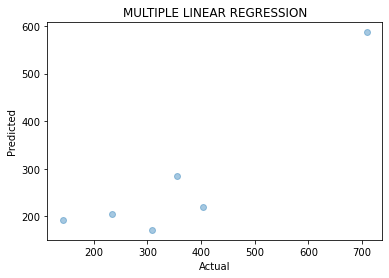

In [8]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [9]:
print(mlr.score(x_train, y_train))

0.6907486792231796


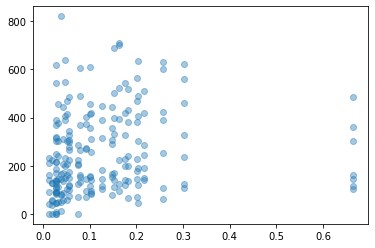

In [18]:
#plt.scatter(df[['강수']], df[['자전거대여량']], alpha=0.4)
#plt.show()

In [20]:
# 시청역
is_sicheong = df['자전거대여소명'] == '시청역'
sicheong = df[is_sicheong]

In [22]:
x = sicheong[['강수','강수형태','기온','풍속','풍향','학원_5분이내수', '학원_5분이내거리최소','학원_5분이내거리평균','학원_5분이내거리최대','버스_5분이내수','버스_5분이내거리최소','버스_5분이내거리평균','버스_5분이내거리최대',
               '콘서트장_5분이내수','콘서트장_5분이내거리최소','콘서트장_5분이내거리평균','콘서트장_5분이내거리최대','공공시설_5분이내수','공공시설_5분이내거리최소','공공시설_5분이내거리평균','공공시설_5분이내거리최대',
               '홀_5분이내수','홀_5분이내거리최소','홀_5분이내거리평균','홀_5분이내거리최대','미술관박물관(전시시설)_5분이내수','미술관박물관(전시시설)_5분이내거리최소','미술관박물관(전시시설)_5분이내거리평균','미술관박물관(전시시설)_5분이내거리최대','학교_5분이내수','학교_5분이내거리최소','학교_5분이내거리평균','학교_5분이내거리최대','체육시설_5분이내수','체육시설_5분이내거리최소',
               '체육시설_5분이내거리평균','체육시설_5분이내거리최대','스타벅스_5분이내수','스타벅스_5분이내거리최소','스타벅스_5분이내거리평균','스타벅스_5분이내거리최대','부동산_5분이내수','부동산_5분이내거리최소','부동산_5분이내거리평균','부동산_5분이내거리최대','학문/교육_5분이내수','학문/교육_5분이내거리최소','학문/교육_5분이내거리평균','학문/교육_5분이내거리최대',
               '음식점_5분이내수','음식점_5분이내거리최소','음식점_5분이내거리평균','음식점_5분이내거리최대','생활서비스_5분이내수','생활서비스_5분이내거리최소','생활서비스_5분이내거리평균','생활서비스_5분이내거리최대','소매점_5분이내수','소매점_5분이내거리최소','소매점_5분이내거리평균','소매점_5분이내거리최대','스포츠_5분이내수','스포츠_5분이내거리최소','스포츠_5분이내거리평균',
               '스포츠_5분이내거리최대','숙박_5분이내수','숙박_5분이내거리최소','숙박_5분이내거리평균','숙박_5분이내거리최대','관광/여가/오락_5분이내수','관광/여가/오락_5분이내거리최소','관광/여가/오락_5분이내거리평균','관광/여가/오락_5분이내거리최대','지하철 역_5분이내수','지하철 역_5분이내거리최소','지하철 역_5분이내거리평균','지하철 역_5분이내거리최대','청소년 수련시설_5분이내수','청소년 수련시설_5분이내거리최소','청소년 수련시설_5분이내거리평균','청소년 수련시설_5분이내거리최대']]
y = sicheong[['자전거대여량']]

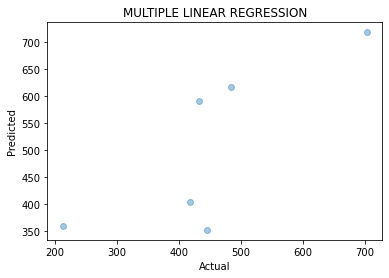

0.7274958975965815


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
mlr = LinearRegression()
mlr.fit(x_train, y_train) 
y_predict = mlr.predict(x_test)
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()
print(mlr.score(x_train, y_train))

In [26]:
# 신중동역
is_sinjoongdong = df['자전거대여소명'] == '신중동역'
sinjoongdong = df[is_sinjoongdong]

In [27]:
x = sinjoongdong[['강수','강수형태','기온','풍속','풍향','학원_5분이내수', '학원_5분이내거리최소','학원_5분이내거리평균','학원_5분이내거리최대','버스_5분이내수','버스_5분이내거리최소','버스_5분이내거리평균','버스_5분이내거리최대',
               '콘서트장_5분이내수','콘서트장_5분이내거리최소','콘서트장_5분이내거리평균','콘서트장_5분이내거리최대','공공시설_5분이내수','공공시설_5분이내거리최소','공공시설_5분이내거리평균','공공시설_5분이내거리최대',
               '홀_5분이내수','홀_5분이내거리최소','홀_5분이내거리평균','홀_5분이내거리최대','미술관박물관(전시시설)_5분이내수','미술관박물관(전시시설)_5분이내거리최소','미술관박물관(전시시설)_5분이내거리평균','미술관박물관(전시시설)_5분이내거리최대','학교_5분이내수','학교_5분이내거리최소','학교_5분이내거리평균','학교_5분이내거리최대','체육시설_5분이내수','체육시설_5분이내거리최소',
               '체육시설_5분이내거리평균','체육시설_5분이내거리최대','스타벅스_5분이내수','스타벅스_5분이내거리최소','스타벅스_5분이내거리평균','스타벅스_5분이내거리최대','부동산_5분이내수','부동산_5분이내거리최소','부동산_5분이내거리평균','부동산_5분이내거리최대','학문/교육_5분이내수','학문/교육_5분이내거리최소','학문/교육_5분이내거리평균','학문/교육_5분이내거리최대',
               '음식점_5분이내수','음식점_5분이내거리최소','음식점_5분이내거리평균','음식점_5분이내거리최대','생활서비스_5분이내수','생활서비스_5분이내거리최소','생활서비스_5분이내거리평균','생활서비스_5분이내거리최대','소매점_5분이내수','소매점_5분이내거리최소','소매점_5분이내거리평균','소매점_5분이내거리최대','스포츠_5분이내수','스포츠_5분이내거리최소','스포츠_5분이내거리평균',
               '스포츠_5분이내거리최대','숙박_5분이내수','숙박_5분이내거리최소','숙박_5분이내거리평균','숙박_5분이내거리최대','관광/여가/오락_5분이내수','관광/여가/오락_5분이내거리최소','관광/여가/오락_5분이내거리평균','관광/여가/오락_5분이내거리최대','지하철 역_5분이내수','지하철 역_5분이내거리최소','지하철 역_5분이내거리평균','지하철 역_5분이내거리최대','청소년 수련시설_5분이내수','청소년 수련시설_5분이내거리최소','청소년 수련시설_5분이내거리평균','청소년 수련시설_5분이내거리최대']]
y = sinjoongdong[['자전거대여량']]

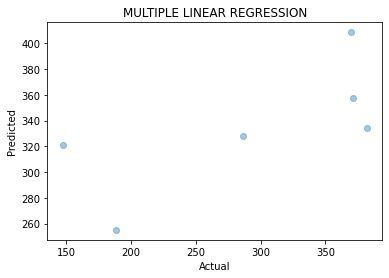

0.7957567544409467


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
mlr = LinearRegression()
mlr.fit(x_train, y_train) 
y_predict = mlr.predict(x_test)
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()
print(mlr.score(x_train, y_train))

In [29]:
# 부천역
is_bucheon = df['자전거대여소명'] == '부천역'
bucheon = df[is_bucheon]

In [30]:
x = bucheon[['강수','강수형태','기온','풍속','풍향','학원_5분이내수', '학원_5분이내거리최소','학원_5분이내거리평균','학원_5분이내거리최대','버스_5분이내수','버스_5분이내거리최소','버스_5분이내거리평균','버스_5분이내거리최대',
               '콘서트장_5분이내수','콘서트장_5분이내거리최소','콘서트장_5분이내거리평균','콘서트장_5분이내거리최대','공공시설_5분이내수','공공시설_5분이내거리최소','공공시설_5분이내거리평균','공공시설_5분이내거리최대',
               '홀_5분이내수','홀_5분이내거리최소','홀_5분이내거리평균','홀_5분이내거리최대','미술관박물관(전시시설)_5분이내수','미술관박물관(전시시설)_5분이내거리최소','미술관박물관(전시시설)_5분이내거리평균','미술관박물관(전시시설)_5분이내거리최대','학교_5분이내수','학교_5분이내거리최소','학교_5분이내거리평균','학교_5분이내거리최대','체육시설_5분이내수','체육시설_5분이내거리최소',
               '체육시설_5분이내거리평균','체육시설_5분이내거리최대','스타벅스_5분이내수','스타벅스_5분이내거리최소','스타벅스_5분이내거리평균','스타벅스_5분이내거리최대','부동산_5분이내수','부동산_5분이내거리최소','부동산_5분이내거리평균','부동산_5분이내거리최대','학문/교육_5분이내수','학문/교육_5분이내거리최소','학문/교육_5분이내거리평균','학문/교육_5분이내거리최대',
               '음식점_5분이내수','음식점_5분이내거리최소','음식점_5분이내거리평균','음식점_5분이내거리최대','생활서비스_5분이내수','생활서비스_5분이내거리최소','생활서비스_5분이내거리평균','생활서비스_5분이내거리최대','소매점_5분이내수','소매점_5분이내거리최소','소매점_5분이내거리평균','소매점_5분이내거리최대','스포츠_5분이내수','스포츠_5분이내거리최소','스포츠_5분이내거리평균',
               '스포츠_5분이내거리최대','숙박_5분이내수','숙박_5분이내거리최소','숙박_5분이내거리평균','숙박_5분이내거리최대','관광/여가/오락_5분이내수','관광/여가/오락_5분이내거리최소','관광/여가/오락_5분이내거리평균','관광/여가/오락_5분이내거리최대','지하철 역_5분이내수','지하철 역_5분이내거리최소','지하철 역_5분이내거리평균','지하철 역_5분이내거리최대','청소년 수련시설_5분이내수','청소년 수련시설_5분이내거리최소','청소년 수련시설_5분이내거리평균','청소년 수련시설_5분이내거리최대']]
y = bucheon[['자전거대여량']]

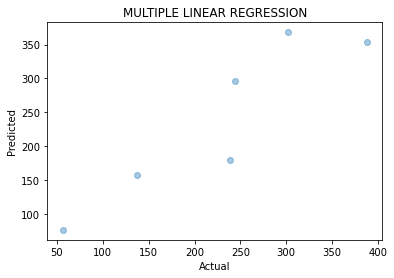

0.5935438088589753


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
mlr = LinearRegression()
mlr.fit(x_train, y_train) 
y_predict = mlr.predict(x_test)
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()
print(mlr.score(x_train, y_train))

In [9]:
# 송내역
is_songnae = df['자전거대여소명'] == '송내역'
songnae = df[is_songnae]

In [10]:
x = songnae[['강수','강수형태','기온','풍속','풍향','학원_5분이내수', '학원_5분이내거리최소','학원_5분이내거리평균','학원_5분이내거리최대','버스_5분이내수','버스_5분이내거리최소','버스_5분이내거리평균','버스_5분이내거리최대',
               '콘서트장_5분이내수','콘서트장_5분이내거리최소','콘서트장_5분이내거리평균','콘서트장_5분이내거리최대','공공시설_5분이내수','공공시설_5분이내거리최소','공공시설_5분이내거리평균','공공시설_5분이내거리최대',
               '홀_5분이내수','홀_5분이내거리최소','홀_5분이내거리평균','홀_5분이내거리최대','미술관박물관(전시시설)_5분이내수','미술관박물관(전시시설)_5분이내거리최소','미술관박물관(전시시설)_5분이내거리평균','미술관박물관(전시시설)_5분이내거리최대','학교_5분이내수','학교_5분이내거리최소','학교_5분이내거리평균','학교_5분이내거리최대','체육시설_5분이내수','체육시설_5분이내거리최소',
               '체육시설_5분이내거리평균','체육시설_5분이내거리최대','스타벅스_5분이내수','스타벅스_5분이내거리최소','스타벅스_5분이내거리평균','스타벅스_5분이내거리최대','부동산_5분이내수','부동산_5분이내거리최소','부동산_5분이내거리평균','부동산_5분이내거리최대','학문/교육_5분이내수','학문/교육_5분이내거리최소','학문/교육_5분이내거리평균','학문/교육_5분이내거리최대',
               '음식점_5분이내수','음식점_5분이내거리최소','음식점_5분이내거리평균','음식점_5분이내거리최대','생활서비스_5분이내수','생활서비스_5분이내거리최소','생활서비스_5분이내거리평균','생활서비스_5분이내거리최대','소매점_5분이내수','소매점_5분이내거리최소','소매점_5분이내거리평균','소매점_5분이내거리최대','스포츠_5분이내수','스포츠_5분이내거리최소','스포츠_5분이내거리평균',
               '스포츠_5분이내거리최대','숙박_5분이내수','숙박_5분이내거리최소','숙박_5분이내거리평균','숙박_5분이내거리최대','관광/여가/오락_5분이내수','관광/여가/오락_5분이내거리최소','관광/여가/오락_5분이내거리평균','관광/여가/오락_5분이내거리최대','지하철 역_5분이내수','지하철 역_5분이내거리최소','지하철 역_5분이내거리평균','지하철 역_5분이내거리최대','청소년 수련시설_5분이내수','청소년 수련시설_5분이내거리최소','청소년 수련시설_5분이내거리평균','청소년 수련시설_5분이내거리최대']]
y = songnae[['자전거대여량']]

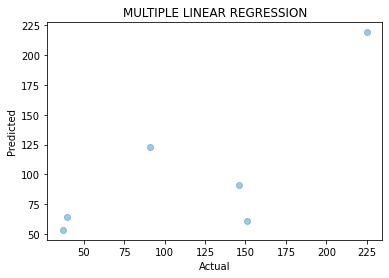

0.6585503141134079


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
mlr = LinearRegression()
mlr.fit(x_train, y_train) 
y_predict = mlr.predict(x_test)
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()
print(mlr.score(x_train, y_train))

In [63]:
# 부천시청역
is_busi = df['자전거대여소명'] == '부천시청'
busi = df[is_busi]

In [64]:
x = busi[['강수','강수형태','기온','풍속','풍향','학원_5분이내수', '학원_5분이내거리최소','학원_5분이내거리평균','학원_5분이내거리최대','버스_5분이내수','버스_5분이내거리최소','버스_5분이내거리평균','버스_5분이내거리최대',
               '콘서트장_5분이내수','콘서트장_5분이내거리최소','콘서트장_5분이내거리평균','콘서트장_5분이내거리최대','공공시설_5분이내수','공공시설_5분이내거리최소','공공시설_5분이내거리평균','공공시설_5분이내거리최대',
               '홀_5분이내수','홀_5분이내거리최소','홀_5분이내거리평균','홀_5분이내거리최대','미술관박물관(전시시설)_5분이내수','미술관박물관(전시시설)_5분이내거리최소','미술관박물관(전시시설)_5분이내거리평균','미술관박물관(전시시설)_5분이내거리최대','학교_5분이내수','학교_5분이내거리최소','학교_5분이내거리평균','학교_5분이내거리최대','체육시설_5분이내수','체육시설_5분이내거리최소',
               '체육시설_5분이내거리평균','체육시설_5분이내거리최대','스타벅스_5분이내수','스타벅스_5분이내거리최소','스타벅스_5분이내거리평균','스타벅스_5분이내거리최대','부동산_5분이내수','부동산_5분이내거리최소','부동산_5분이내거리평균','부동산_5분이내거리최대','학문/교육_5분이내수','학문/교육_5분이내거리최소','학문/교육_5분이내거리평균','학문/교육_5분이내거리최대',
               '음식점_5분이내수','음식점_5분이내거리최소','음식점_5분이내거리평균','음식점_5분이내거리최대','생활서비스_5분이내수','생활서비스_5분이내거리최소','생활서비스_5분이내거리평균','생활서비스_5분이내거리최대','소매점_5분이내수','소매점_5분이내거리최소','소매점_5분이내거리평균','소매점_5분이내거리최대','스포츠_5분이내수','스포츠_5분이내거리최소','스포츠_5분이내거리평균',
               '스포츠_5분이내거리최대','숙박_5분이내수','숙박_5분이내거리최소','숙박_5분이내거리평균','숙박_5분이내거리최대','관광/여가/오락_5분이내수','관광/여가/오락_5분이내거리최소','관광/여가/오락_5분이내거리평균','관광/여가/오락_5분이내거리최대','지하철 역_5분이내수','지하철 역_5분이내거리최소','지하철 역_5분이내거리평균','지하철 역_5분이내거리최대','청소년 수련시설_5분이내수','청소년 수련시설_5분이내거리최소','청소년 수련시설_5분이내거리평균','청소년 수련시설_5분이내거리최대']]
y = busi[['자전거대여량']]

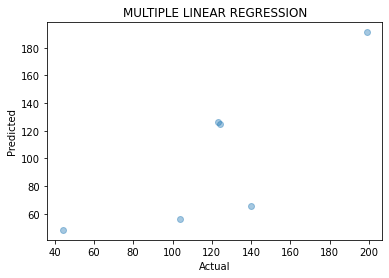

0.43918481469489123


In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
mlr = LinearRegression()
mlr.fit(x_train, y_train) 
y_predict = mlr.predict(x_test)
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()
print(mlr.score(x_train, y_train))

In [66]:
# 굴포천역
is_gool = df['자전거대여소명'] == '굴포천'
gool = df[is_gool]

In [76]:
x = gool[['강수','강수형태','기온','풍속','풍향','학원_5분이내수', '학원_5분이내거리최소','학원_5분이내거리평균','학원_5분이내거리최대','버스_5분이내수','버스_5분이내거리최소','버스_5분이내거리평균','버스_5분이내거리최대',
               '콘서트장_5분이내수','콘서트장_5분이내거리최소','콘서트장_5분이내거리평균','콘서트장_5분이내거리최대','공공시설_5분이내수','공공시설_5분이내거리최소','공공시설_5분이내거리평균','공공시설_5분이내거리최대',
               '홀_5분이내수','홀_5분이내거리최소','홀_5분이내거리평균','홀_5분이내거리최대','미술관박물관(전시시설)_5분이내수','미술관박물관(전시시설)_5분이내거리최소','미술관박물관(전시시설)_5분이내거리평균','미술관박물관(전시시설)_5분이내거리최대','학교_5분이내수','학교_5분이내거리최소','학교_5분이내거리평균','학교_5분이내거리최대','체육시설_5분이내수','체육시설_5분이내거리최소',
               '체육시설_5분이내거리평균','체육시설_5분이내거리최대','스타벅스_5분이내수','스타벅스_5분이내거리최소','스타벅스_5분이내거리평균','스타벅스_5분이내거리최대','부동산_5분이내수','부동산_5분이내거리최소','부동산_5분이내거리평균','부동산_5분이내거리최대','학문/교육_5분이내수','학문/교육_5분이내거리최소','학문/교육_5분이내거리평균','학문/교육_5분이내거리최대',
               '음식점_5분이내수','음식점_5분이내거리최소','음식점_5분이내거리평균','음식점_5분이내거리최대','생활서비스_5분이내수','생활서비스_5분이내거리최소','생활서비스_5분이내거리평균','생활서비스_5분이내거리최대','소매점_5분이내수','소매점_5분이내거리최소','소매점_5분이내거리평균','소매점_5분이내거리최대','스포츠_5분이내수','스포츠_5분이내거리최소','스포츠_5분이내거리평균',
               '스포츠_5분이내거리최대','숙박_5분이내수','숙박_5분이내거리최소','숙박_5분이내거리평균','숙박_5분이내거리최대','관광/여가/오락_5분이내수','관광/여가/오락_5분이내거리최소','관광/여가/오락_5분이내거리평균','관광/여가/오락_5분이내거리최대','지하철 역_5분이내수','지하철 역_5분이내거리최소','지하철 역_5분이내거리평균','지하철 역_5분이내거리최대','청소년 수련시설_5분이내수','청소년 수련시설_5분이내거리최소','청소년 수련시설_5분이내거리평균','청소년 수련시설_5분이내거리최대']]
y = gool[['자전거대여량']]

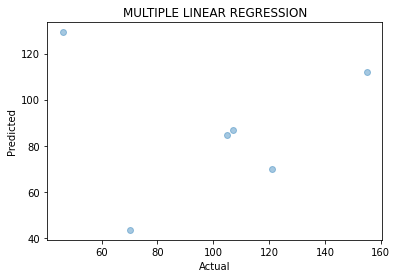

0.3772805919860721


In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
mlr = LinearRegression()
mlr.fit(x_train, y_train) 
y_predict = mlr.predict(x_test)
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()
print(mlr.score(x_train, y_train))

In [131]:
# 전진단계별 선택법

variables = df[['강수','강수형태','기온','풍속','풍향','학원_5분이내수', '학원_5분이내거리최소','학원_5분이내거리평균','학원_5분이내거리최대','버스_5분이내수','버스_5분이내거리최소','버스_5분이내거리평균','버스_5분이내거리최대',
               '콘서트장_5분이내수','콘서트장_5분이내거리최소','콘서트장_5분이내거리평균','콘서트장_5분이내거리최대','공공시설_5분이내수','공공시설_5분이내거리최소','공공시설_5분이내거리평균','공공시설_5분이내거리최대',
               '홀_5분이내수','홀_5분이내거리최소','홀_5분이내거리평균','홀_5분이내거리최대','미술관박물관(전시시설)_5분이내수','미술관박물관(전시시설)_5분이내거리최소','미술관박물관(전시시설)_5분이내거리평균','미술관박물관(전시시설)_5분이내거리최대','학교_5분이내수','학교_5분이내거리최소','학교_5분이내거리평균','학교_5분이내거리최대','체육시설_5분이내수','체육시설_5분이내거리최소',
               '체육시설_5분이내거리평균','체육시설_5분이내거리최대','스타벅스_5분이내수','스타벅스_5분이내거리최소','스타벅스_5분이내거리평균','스타벅스_5분이내거리최대','부동산_5분이내수','부동산_5분이내거리최소','부동산_5분이내거리평균','부동산_5분이내거리최대','학문/교육_5분이내수','학문/교육_5분이내거리최소','학문/교육_5분이내거리평균','학문/교육_5분이내거리최대',
               '음식점_5분이내수','음식점_5분이내거리최소','음식점_5분이내거리평균','음식점_5분이내거리최대','생활서비스_5분이내수','생활서비스_5분이내거리최소','생활서비스_5분이내거리평균','생활서비스_5분이내거리최대','소매점_5분이내수','소매점_5분이내거리최소','소매점_5분이내거리평균','소매점_5분이내거리최대','스포츠_5분이내수','스포츠_5분이내거리최소','스포츠_5분이내거리평균',
               '스포츠_5분이내거리최대','숙박_5분이내수','숙박_5분이내거리최소','숙박_5분이내거리평균','숙박_5분이내거리최대','관광/여가/오락_5분이내수','관광/여가/오락_5분이내거리최소','관광/여가/오락_5분이내거리평균','관광/여가/오락_5분이내거리최대','지하철 역_5분이내수','지하철 역_5분이내거리최소','지하철 역_5분이내거리평균','지하철 역_5분이내거리최대','청소년 수련시설_5분이내수','청소년 수련시설_5분이내거리최소','청소년 수련시설_5분이내거리평균','청소년 수련시설_5분이내거리최대']]
y = df[['자전거대여량']]


selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = df[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

<ipython-input-131-48bb97dc068f>:22: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-131-48bb97dc068f>:22: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-131-48bb97dc068f>:22: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-131-48bb97dc068f>:22: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)

In [132]:
selected_variables

['청소년 수련시설_5분이내거리최소',
 '학원_5분이내거리최소',
 '스포츠_5분이내거리최대',
 '기온',
 '스포츠_5분이내거리평균',
 '부동산_5분이내거리최대',
 '강수형태',
 '풍속']

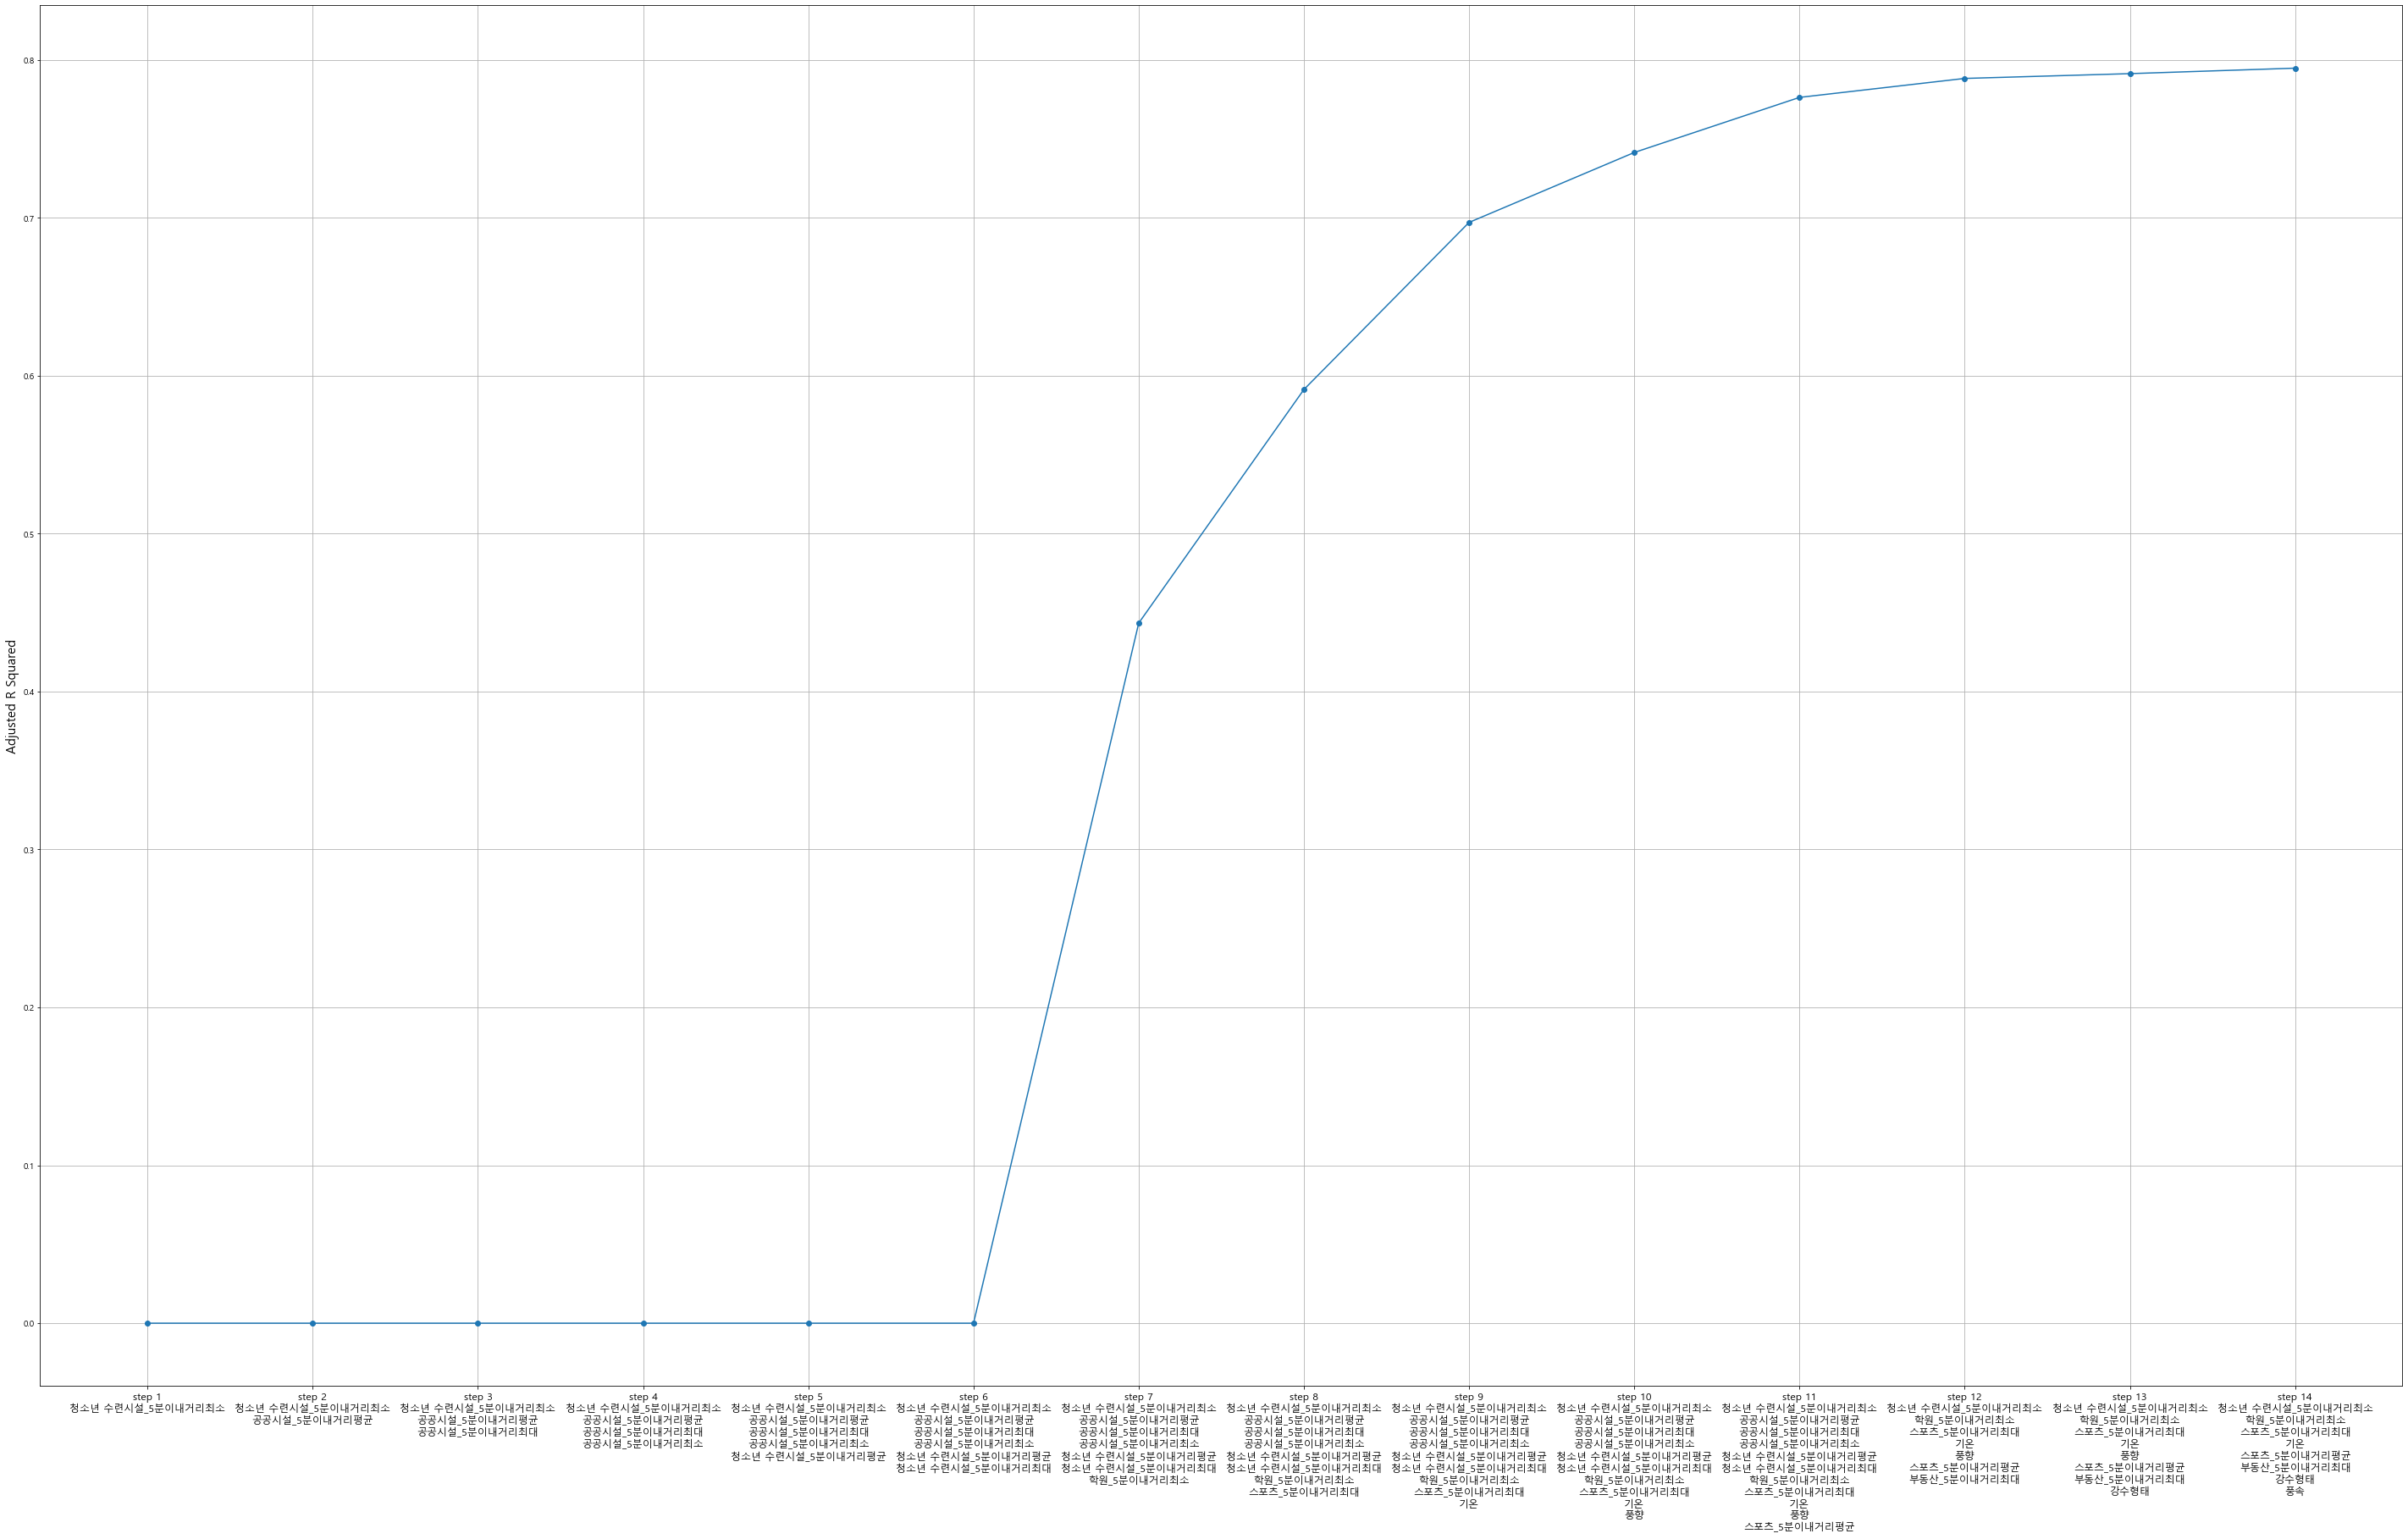

In [133]:
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')
plt.rc('axes', unicode_minus = False)

%matplotlib inline


fig = plt.figure(figsize=(50,30))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [5]:
# 전체역
x = df[['강수','강수형태','기온','풍속','풍향','학원_5분이내수', '학원_5분이내거리최소','학원_5분이내거리평균','학원_5분이내거리최대','버스_5분이내수','버스_5분이내거리최소','버스_5분이내거리평균','버스_5분이내거리최대',
               '콘서트장_5분이내수','콘서트장_5분이내거리최소','콘서트장_5분이내거리평균','콘서트장_5분이내거리최대','공공시설_5분이내수','공공시설_5분이내거리최소','공공시설_5분이내거리평균','공공시설_5분이내거리최대',
               '홀_5분이내수','홀_5분이내거리최소','홀_5분이내거리평균','홀_5분이내거리최대','미술관박물관(전시시설)_5분이내수','미술관박물관(전시시설)_5분이내거리최소','미술관박물관(전시시설)_5분이내거리평균','미술관박물관(전시시설)_5분이내거리최대','학교_5분이내수','학교_5분이내거리최소','학교_5분이내거리평균','학교_5분이내거리최대','체육시설_5분이내수','체육시설_5분이내거리최소',
               '체육시설_5분이내거리평균','체육시설_5분이내거리최대','스타벅스_5분이내수','스타벅스_5분이내거리최소','스타벅스_5분이내거리평균','스타벅스_5분이내거리최대','부동산_5분이내수','부동산_5분이내거리최소','부동산_5분이내거리평균','부동산_5분이내거리최대','학문/교육_5분이내수','학문/교육_5분이내거리최소','학문/교육_5분이내거리평균','학문/교육_5분이내거리최대',
               '음식점_5분이내수','음식점_5분이내거리최소','음식점_5분이내거리평균','음식점_5분이내거리최대','생활서비스_5분이내수','생활서비스_5분이내거리최소','생활서비스_5분이내거리평균','생활서비스_5분이내거리최대','소매점_5분이내수','소매점_5분이내거리최소','소매점_5분이내거리평균','소매점_5분이내거리최대','스포츠_5분이내수','스포츠_5분이내거리최소','스포츠_5분이내거리평균',
               '스포츠_5분이내거리최대','숙박_5분이내수','숙박_5분이내거리최소','숙박_5분이내거리평균','숙박_5분이내거리최대','관광/여가/오락_5분이내수','관광/여가/오락_5분이내거리최소','관광/여가/오락_5분이내거리평균','관광/여가/오락_5분이내거리최대','지하철 역_5분이내수','지하철 역_5분이내거리최소','지하철 역_5분이내거리평균','지하철 역_5분이내거리최대','청소년 수련시설_5분이내수','청소년 수련시설_5분이내거리최소','청소년 수련시설_5분이내거리평균','청소년 수련시설_5분이내거리최대']]
y = df[['자전거대여량']]

x_adjust = df[[
 '학원_5분이내거리최소',
 '스포츠_5분이내거리최대',
 '기온',
 '스포츠_5분이내거리평균',
 '부동산_5분이내거리최대',
 '강수형태',
 '풍속'
]] # 선택

display(x_adjust)

,학원_5분이내거리최소,스포츠_5분이내거리최대,기온,스포츠_5분이내거리평균,부동산_5분이내거리최대,강수형태,풍속
0,0.000709,0.003543,6.563172,0.002745,0.003916,0.036290,0.944220
1,0.000709,0.003543,13.501667,0.002745,0.003916,0.055556,1.083333
2,0.000709,0.003543,18.493280,0.002745,0.003916,0.037634,0.996102
3,0.000709,0.003543,22.890278,0.002745,0.003916,0.000000,0.988056
4,0.000709,0.003543,26.819086,0.002745,0.003916,0.000000,0.983333
...,...,...,...,...,...,...,...
205,0.002500,0.002500,26.125672,0.002500,0.003719,0.034946,0.310081
206,0.002500,0.002500,21.795417,0.002500,0.003719,0.086111,0.453750
207,0.002500,0.002500,14.989516,0.002500,0.003719,0.044355,0.413441
208,0.002500,0.002500,5.799861,0.002500,0.003719,0.061111,0.443889


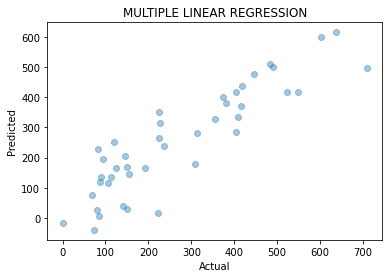

0.8012740237752908


,학원_5분이내거리최소,스포츠_5분이내거리최대,기온,스포츠_5분이내거리평균,부동산_5분이내거리최대,강수형태,풍속
36,0.000192,0.002914,22.038194,0.001586,0.003824,0.000000,0.874861
92,0.000715,0.003997,18.493280,0.002616,0.004012,0.037634,0.996102
169,0.001165,0.003951,-1.892876,0.002718,0.004029,0.045699,0.951210
192,0.002500,0.002500,17.784409,0.002500,0.003719,0.170699,1.004032
183,0.002500,0.002500,22.890278,0.002500,0.003719,0.000000,0.988056


,학원_5분이내거리최소,스포츠_5분이내거리최대,기온,스포츠_5분이내거리평균,부동산_5분이내거리최대,강수형태,풍속
97,0.000715,0.003997,15.671909,0.002616,0.004012,0.043011,0.870699
185,0.002500,0.002500,25.996102,0.002500,0.003719,0.000000,1.053629
101,0.000715,0.003997,12.871111,0.002616,0.004012,0.137500,1.186250
45,0.000192,0.002914,28.147849,0.001586,0.003824,0.065860,0.464651
165,0.001165,0.003951,28.147849,0.002718,0.004029,0.065860,0.464651


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_adjust, y, train_size=0.8, test_size=0.2)
mlr = LinearRegression()
mlr.fit(x_train, y_train) 
y_predict = mlr.predict(x_test)
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()
print(mlr.score(x_train, y_train))
display(x_train.head())
display(x_test.head())

In [136]:
# 최종 변수 선택

import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

model = smf.ols(formula = '자전거대여량 ~ x_adjust -1', data = df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 자전거대여량   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                              426.6
Date:                Sun, 25 Apr 2021   Prob (F-statistic):                   1.06e-117
Time:                        12:56:45   Log-Likelihood:                         -1209.2
No. Observations:                 210   AIC:                                      2432.
Df Residuals:                     203   BIC:                                      2456.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
x_adjust[0] -3.197e+05   1.62e+04    -19.697      0.000   -3.52e+05   -2.88e+05
x_adjust[1] -3.667e+05   2.59e+04    -14.161      0.000   -4.18e+05   -3.16e+05
x_adjust[2]     5.9361      0.647      9.170      0.000       4.660       7.213
x_adjust[3]  2.366e+05   3.14e+04      7.533      0.000    1.75e+05    2.99e+05
x_adjust[4]  3.213e+05   1.58e+04     20.372      0.000     2.9e+05    3.52e+05
x_adjust[5]   400.4830    128.537      3.116      0.002     147.044     653.922
x_adjust[6]  -137.7556     19.274     -7.147      0.000    -175.759     -99.752
==============================================================================
Omnibus:                       14.179   Durbin-Watson:                   1.454
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               32.974
Skew:                           0.221   Prob(JB):                     6.92e-08
Kurtosis:                       4.890   Cond. No.                     1.39e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""